In [103]:
#importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import gc
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score,KFold
import warnings as w
w.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)

In [104]:
#reading data
df = pd.read_csv(r"C:\Users\Nishad\Desktop\data.csv")

In [105]:
#having the first look at data
df.head(10)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1
5,False,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,7440e233,84ebbcd4,1,0,17614,320,50,1993,2,1063,100084,33,10,3,30,17,0
6,False,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285aa37d,03683bd4,1,0,23369,320,50,2680,3,815,100156,42,10,3,30,7,0
7,False,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,140c5171,f51246a7,1,0,20984,320,50,2371,0,559,100217,46,10,3,30,10,0
8,False,1005,0,85f751fd,c4e18dd6,50e219e0,fc6dc16f,5c5a694b,0f2161f8,848ff98a,45867dad,b4d21d55,1,2,20392,320,50,2340,3,41,100111,159,10,5,25,15,0
9,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ac116eec,5096d134,1,0,15705,320,50,1722,0,35,-1,79,10,4,24,16,0


## 1. Perform missing value and outlier treatment, if needed, in the data set you received.

In [106]:
df.shape

(99999, 27)

In [107]:
#finding null values
df.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [108]:
df.dtypes

click                 bool
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

##### As there are no null values we can move forward to making the data such that we can plot it to see categorical columns

The datatypes of columns are perfect as per data

let us have a look at which columns are most categorical and relevent.
Clearly 'click' should be the target 

## 2. Identify the categorical columns 

False    83019
True     16980
Name: click, dtype: int64


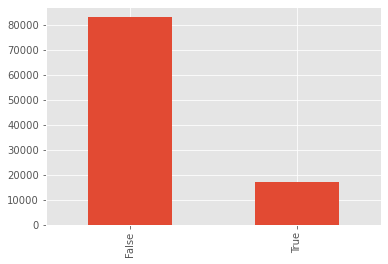

In [109]:
#count of clicks
df.click.value_counts().plot(kind='bar')
print(df.click.value_counts())

In [110]:
#count of banner pos
df.banner_pos.value_counts()

0    71778
1    28052
7      107
2       30
4       19
5        9
3        4
Name: banner_pos, dtype: int64

In [111]:
#lets check site id
temp = df.site_id.unique()
len(temp)

1485

In [112]:
#lets check site domain
temp = df.site_domain.unique()
len(temp)

1331

In [113]:
#lets check site category
temp = df.site_category.unique()
len(temp)

19

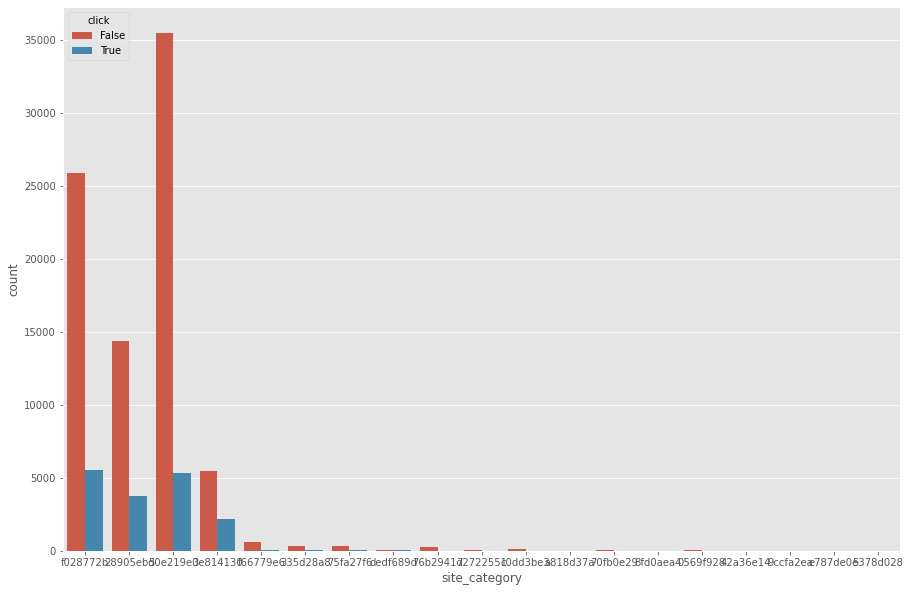

In [114]:
#lets check site category wrt clicks
plt.figure(figsize=(15,10))
sns.countplot(x='site_category',hue='click',data=df)

In [115]:
#lets check app domain
temp = df.app_id.unique()
len(temp)

1354

In [116]:
#lets check app domain
temp = df.app_domain.unique()
len(temp)

96

In [117]:
#lets check app category
temp = df.app_category.unique()
len(temp)

21

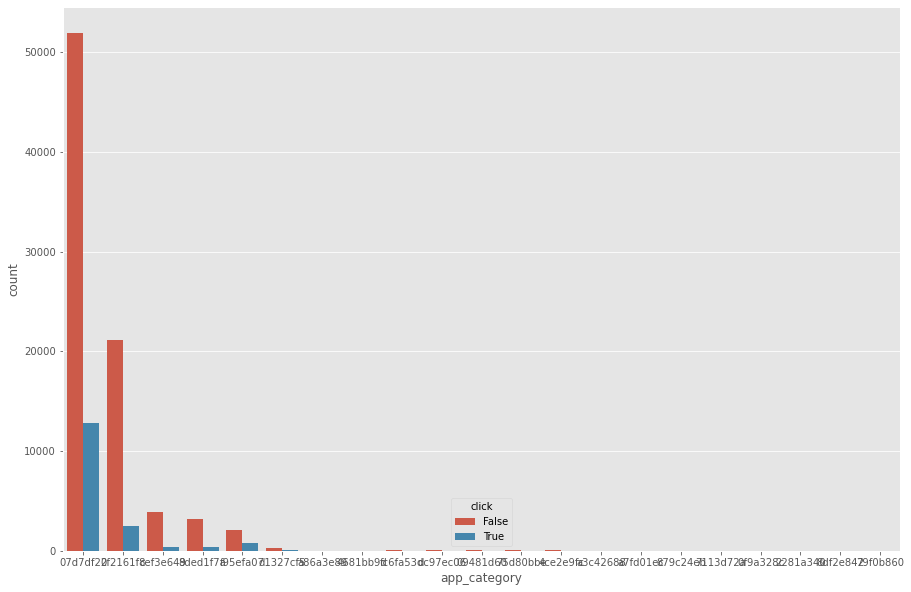

In [118]:
#lets check app category wrt clicks
plt.figure(figsize=(15,10))
sns.countplot(x='app_category',hue='click',data=df)

In [119]:
#lets check device id
temp = df.device_id.unique()
len(temp)

16801

In [120]:
#lets check device ip
temp = df.device_ip.unique()
len(temp)

78013

In [121]:
#lets check device model
temp = df.device_model.unique()
len(temp)

3145

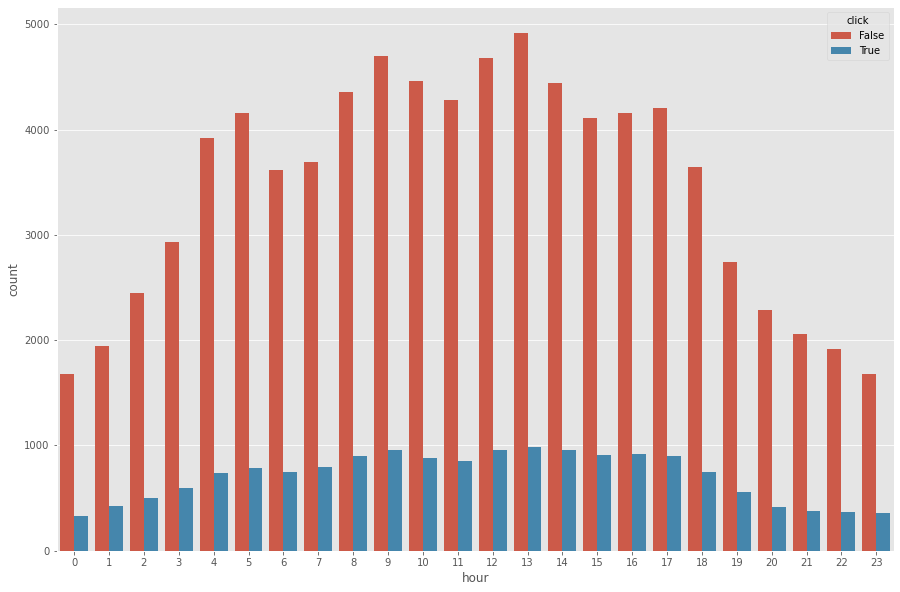

In [122]:
#clicks on respective houurs
plt.figure(figsize=(15,10))
sns.countplot(x='hour',hue='click',data=df)

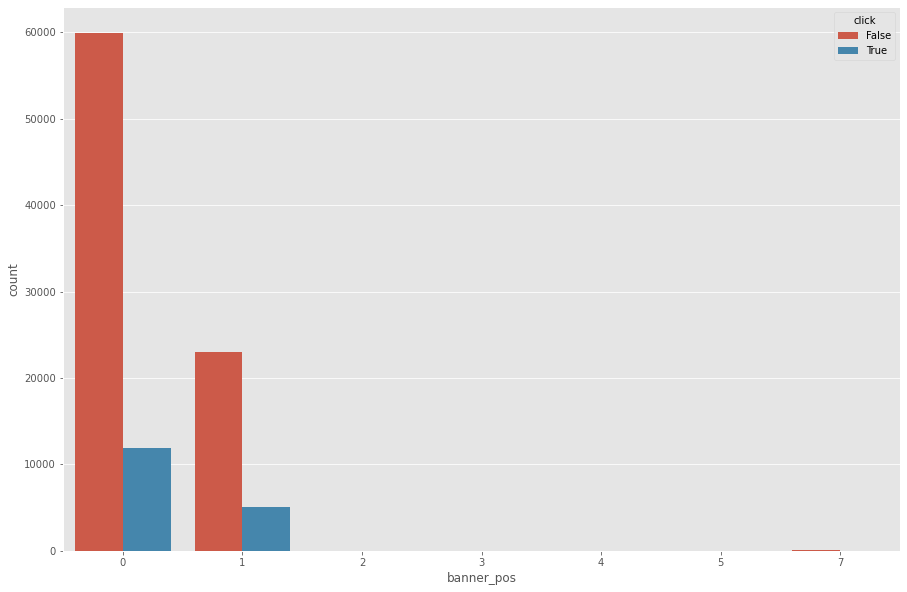

In [123]:
#clicks on banner pos
plt.figure(figsize=(15,10))
sns.countplot(x='banner_pos',hue='click',data=df)

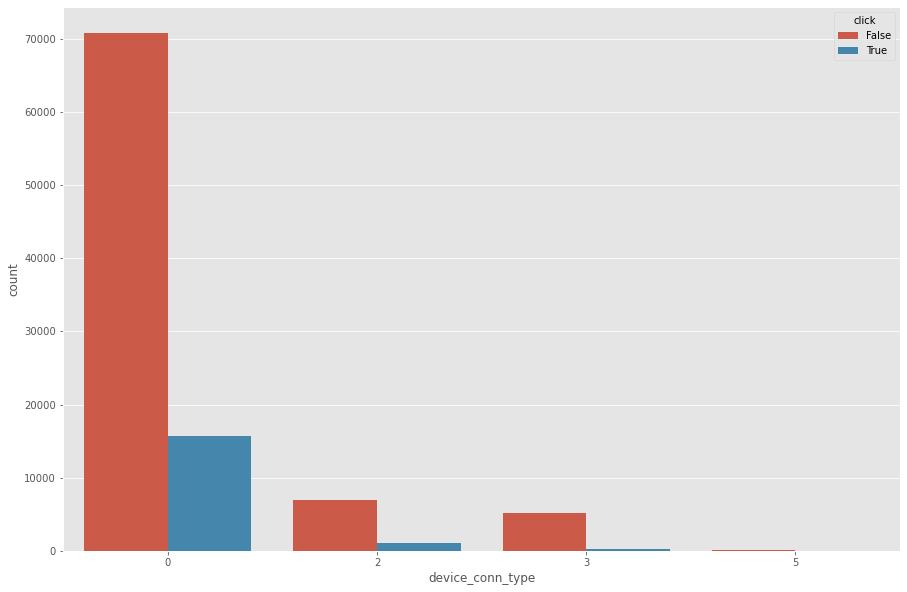

In [124]:
#clicks on device_conn_type
plt.figure(figsize=(15,10))
sns.countplot(x='device_conn_type',hue='click',data=df)

As we can seee here these('site_id','site_domain','app_id','app_domain','device_id','device_ip','device_model') columns are not categorized and are random. so lets drop these columns.

In [132]:
#dropping unnecesssary columns
X = df.drop(['click','site_id','site_domain','site_category','app_id','app_domain','app_category','device_id','device_ip','device_model'],axis=1)
y = df['click']

## 3. Perform a train-test split in the data set (the usual split followed in the industry is 70-30 or 80-20).

In [133]:
#test train plit 70;-30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

## 4. Identify the 3 classification methods you will use in the data set, and explain the reason you chose those 3 methods in the notebook file you will share in the submission process.

As we have a target variable which is binary the first model to think of is logistic regression model as that model is specifically designed for this purpose

Apart from that we also have a large collection of categorical data in which models like random forests and decision tree works well so lets take those two as other options

## 5. For all 3 methods, use appropriate evaluation metrics to assess model performance. Also, evaluate the models' basis the cross-validation.

Here I am using 4 evaluation techniques for all three models

1. confussion matrix 

2. model score

3. auc curve

4. cross validation

In [134]:
#logistic regression
model = LogisticRegression()

In [135]:
model.fit(X_train,y_train)

LogisticRegression()

In [136]:
preds = model.predict(X_test)
preds

array([False, False, False, ..., False, False, False])

In [137]:
np.array(y_test)

array([False, False, False, ...,  True, False, False])

In [138]:
#confusion matrix for logistic regression
tp, fn, fp, tn = confusion_matrix(y_test,preds, labels= (1,0)).ravel()
precision = tp/(tp+fp)
precision

0.3037974683544304

In [139]:
#check the score
model.score(X_test,y_test)

0.8277878787878787

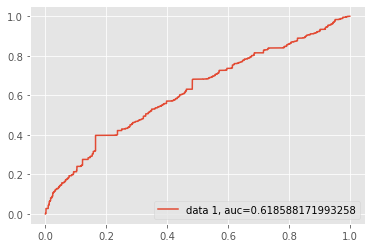

In [140]:
#lets plot the auc curve 
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [141]:
#cross vallidation for logistic regression
kf=KFold(n_splits=5)
score=cross_val_score(model,X_test,y_test,cv=kf)
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :0.8277878787878787


As we can see here the model is working pretty good let us see weather it works better on other models as well or not

In [142]:
#decision tree
model = tree.DecisionTreeClassifier()

In [143]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
preds = model.predict(X_test)

In [145]:
#confusion matrix for decision tree
tp, fn, fp, tn = confusion_matrix(y_test,preds, labels= (1,0)).ravel()
precision = tp/(tp+fp)
precision

1.0

In [146]:
#lets see the model score
model.score(X_test,y_test)

1.0

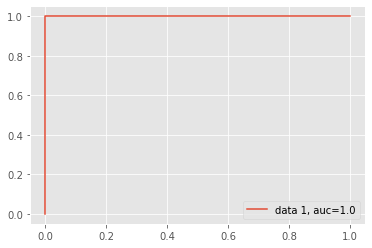

In [147]:
#lets plot the auc curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [148]:
#cross vallidation for decision tree
kf=KFold(n_splits=5)
score=cross_val_score(model,X_test,y_test,cv=kf)
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :1.0


As we can see here the score is 1 so for every test case of 300000 tests the model has returned a perfect output

Let us still see another classification method

In [149]:
#random forest
model = RandomForestClassifier(n_estimators = 100) 

In [150]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
preds = model.predict(X_test)


In [152]:
#confusion matrix for random forest
tp, fn, fp, tn = confusion_matrix(y_test,preds, labels= (1,0)).ravel()
precision = tp/(tp+fp)
precision

1.0

In [153]:
#score for random forest
model.score(X_test,y_test)

1.0

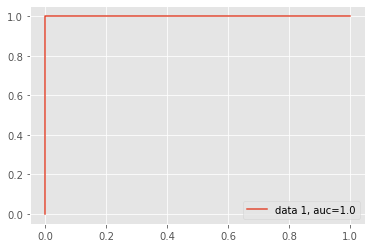

In [154]:
#lets plot the auc curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [155]:
#cross vallidation for randomm forest
kf=KFold(n_splits=5)
score=cross_val_score(model,X_test,y_test,cv=kf)
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :1.0


As we can see here the model has again performed perfectly over all the test cases in less time thus we can say that the model is ready

## 6. Compare which methods work best based on the evaluation metrics mentioned in the previous point.

As we can see here all the three models performed perfectly on random sample test data multiple times .it is best to perform a logistic regression in this scenario as it is showing precision of 1 in the least computation and processing time.

let us make our logisic regression model as optimal as possible

## 7. Use model simplification techniques like feature creation and selection, to improve model predictability. 

The method that i am using here is Recursive Feature Elimination also knnown as rfe as it returns the rank of features which are categorically most relevent

In [156]:
#performing RFE
model = LogisticRegression()
recur_fe = RFE(model)
recur_fe.fit(X,y).ranking_


array([ 1,  1,  1,  1,  8,  4,  6,  7,  1,  9, 10,  5,  3,  1,  1,  2,  1])

In [157]:
X.head()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,1005,1,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,1005,1,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,1005,0,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,1002,0,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,1005,0,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


C14
C15
C16
C17
C19
C20
C21
month
As we can see here these features are low ranked thus the model will perform well without these features 

In [158]:
#dropping unnecessary columns and defining x and y again
X = X.drop(['C14', 'C15', 'C16', 'C17', 'C19', 'C20', 'C21', 'month'], axis = 1)
y = df['click']

In [159]:
#test train dplit after rfe
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [160]:
#performing logistic regressionn again
model = LogisticRegression()

In [161]:
model.fit(X_train,y_train)

LogisticRegression()

In [162]:
preds = model.predict(X_test)
preds

array([False,  True, False, ..., False,  True, False])

In [163]:
#confussin matrix
tp, fn, fp, tn = confusion_matrix(y_test,preds, labels= (1,0)).ravel()
precision = tp/(tp+fp)
precision

1.0

In [164]:
#model score
model.score(X_test,y_test)

1.0

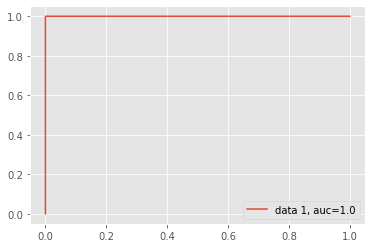

In [165]:
#auc curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [166]:
#cross vallidation for randomm forest
kf=KFold(n_splits=5)
score=cross_val_score(model,X_test,y_test,cv=kf)
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :1.0


## 8. After building the best model possible, explain the risks associated with adopting the model to the business team (You can create a 3-5 slide presentation)

please find the below attatched presentation for this answer